In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Real Fake News.csv')

In [3]:
#Data Exploration
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [4]:
df.tail(2)

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [6]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,BinaryNumTarget
count,4870.000000,4870.000000,4870.000000
mean,1217.500000,1217.500000,0.500000
std,702.996251,702.996251,0.500051
min,0.000000,0.000000,0.000000
25%,609.000000,609.000000,0.000000
50%,1217.500000,1217.500000,0.500000
75%,1826.000000,1826.000000,1.000000
max,2435.000000,2435.000000,1.000000


In [7]:
df.corr()['BinaryNumTarget'].sort_values(ascending=False)

target             1.000000
BinaryNumTarget    1.000000
Unnamed: 0        -0.000711
Unnamed: 0.1      -0.000711
Name: BinaryNumTarget, dtype: float64

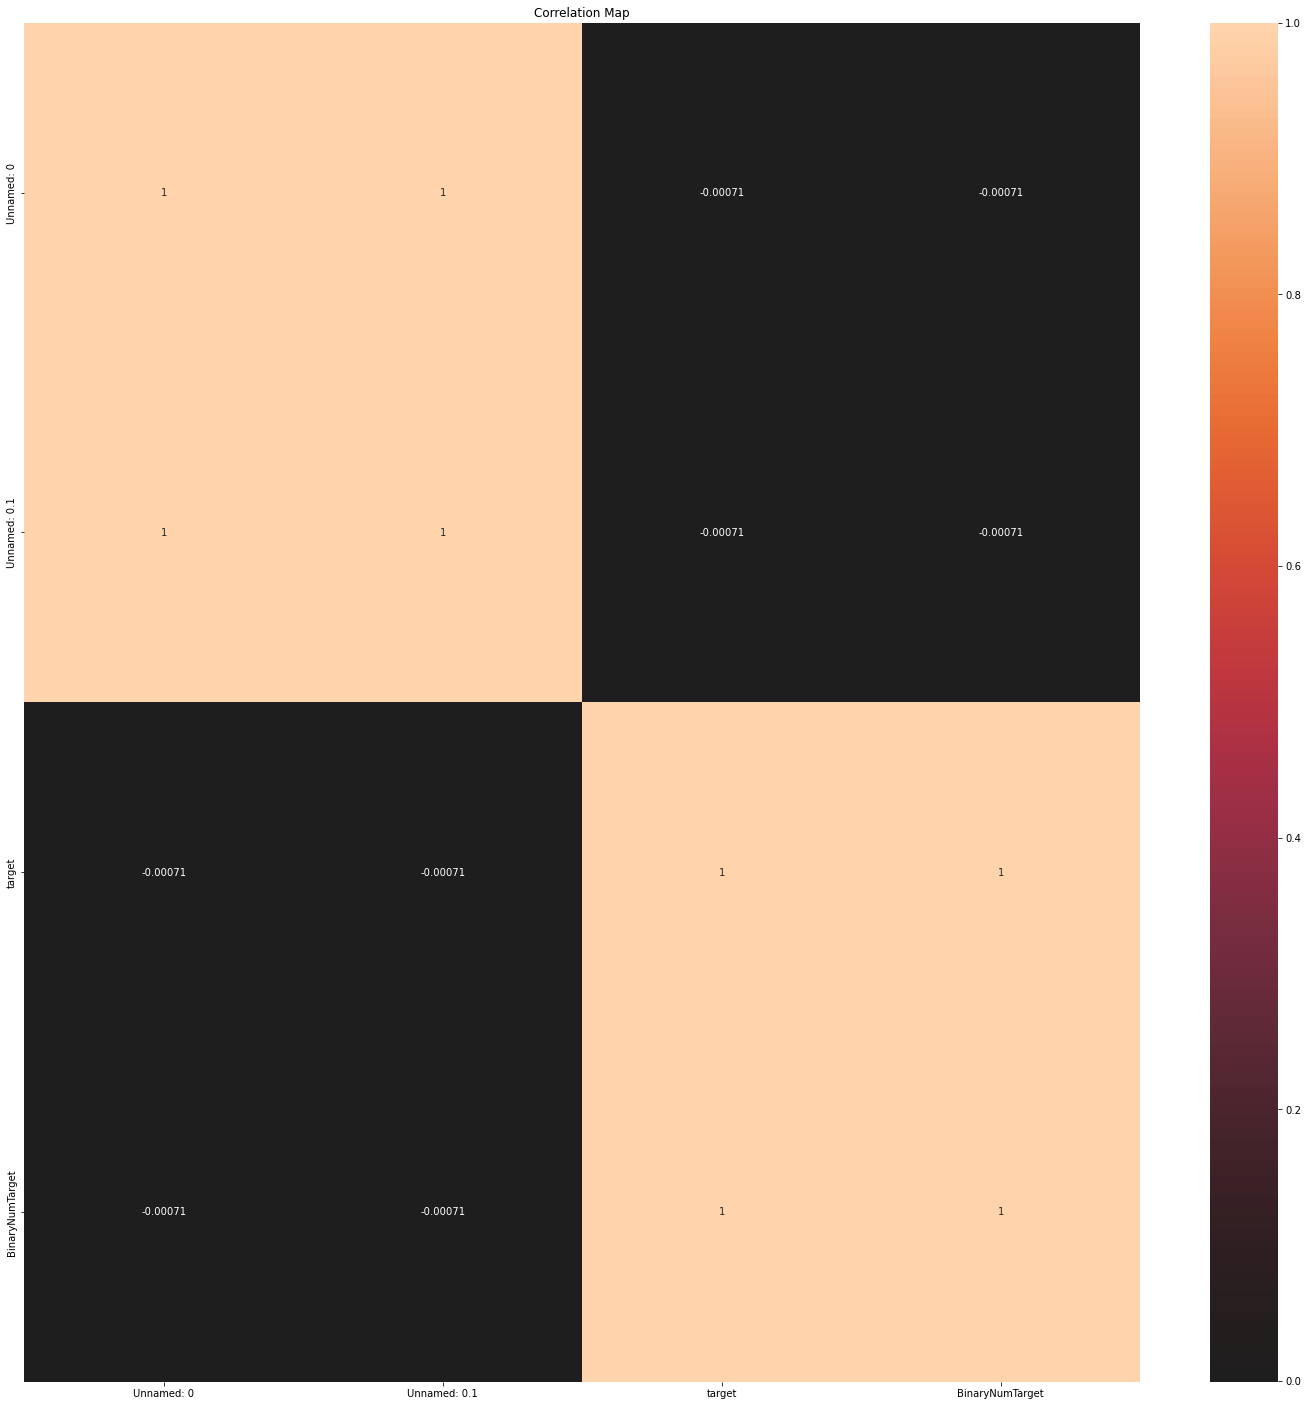

In [8]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [9]:
num_atr=[ 'Unnamed: 0.1', 'target']

cat_atr=['author','statement','source','BinaryTarget']

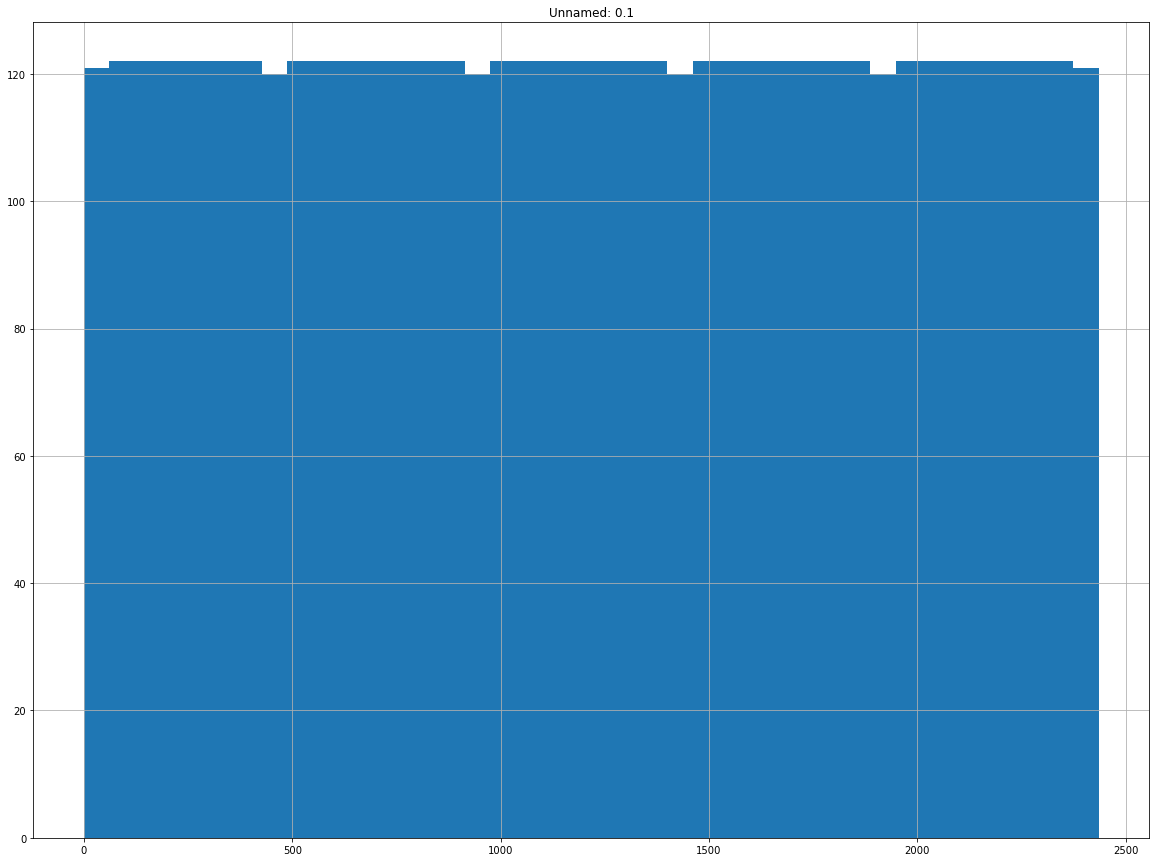

In [10]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

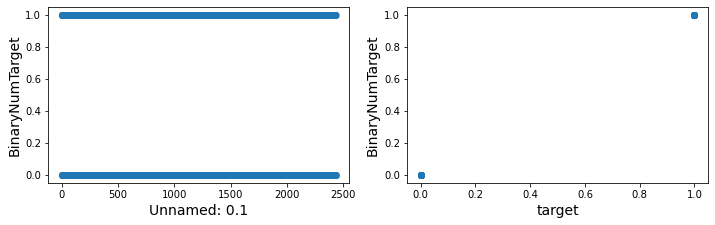

In [11]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=df,y='BinaryNumTarget',x=i,alpha=0.5)
    plt.ylabel('BinaryNumTarget',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

In [12]:
df.isna().sum()

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [13]:
df.dropna(inplace=True, axis=0)

In [14]:
df.isna().sum()

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [15]:
df.shape

(4870, 8)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [17]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,1:-1]
y= df.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
df. reset_index()

,index,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...,...,...,...
4865,4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_train[num_atr] = ss.fit_transform(X_train[num_atr])



C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [20]:
X_train[num_atr].head()

,Unnamed: 0.1,target
4725,1.527575,-0.985150
3214,-0.625366,-0.985150
498,-1.027172,1.015074
4235,0.829401,-0.985150
2312,1.557497,1.015074


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
X_train[cat_atr].head()

,author,statement,source,BinaryTarget
4725,44,2086,1087,0
3214,162,367,342,0
498,184,683,1061,1
4235,252,1998,342,0
2312,215,1322,508,1


In [23]:
#a = pd.DataFrame(X_train[cat_atr])
#b = pd.DataFrame(X_train[num_atr])
a=X_train[cat_atr]
b=X_train[num_atr]
#b = ss.transform(price[num_atr])
print (a.head())
print (b.head())
# 7.1 Horizontally concatenate now
#Xtr = np.hstack([a,b]) # It is not X_train
#Xtr.shape # (11,15)

      author  statement  source  BinaryTarget
4725      44       2086    1087             0
3214     162        367     342             0
498      184        683    1061             1
4235     252       1998     342             0
2312     215       1322     508             1
      Unnamed: 0.1    target
4725      1.527575 -0.985150
3214     -0.625366 -0.985150
498      -1.027172  1.015074
4235      0.829401 -0.985150
2312      1.557497  1.015074


In [24]:
Xtr = pd.concat([a,b], axis=1)

In [25]:
Xtr.head()

,author,statement,source,BinaryTarget,Unnamed: 0.1,target
4725,44,2086,1087,0,1.527575,-0.985150
3214,162,367,342,0,-0.625366,-0.985150
498,184,683,1061,1,-1.027172,1.015074
4235,252,1998,342,0,0.829401,-0.985150
2312,215,1322,508,1,1.557497,1.015074


In [26]:
y_train.head()

4725    0
3214    0
498     1
4235    0
2312    1
Name: BinaryNumTarget, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [28]:
reg.fit(Xtr, y_train)

RandomForestRegressor()

In [29]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_test[num_atr] = ss.fit_transform(X_test[num_atr])

le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
a=X_test[cat_atr]
b=X_test[num_atr]

In [31]:
Xtr1 = pd.concat([a,b], axis=1)

In [32]:
Xtr1.head()

,author,statement,source,BinaryTarget,Unnamed: 0.1,target
1654,9,276,189,1,0.623381,0.965681
1101,103,177,375,1,-0.160508,0.965681
1149,182,1035,484,1,-0.092467,0.965681
2763,192,569,190,0,-1.254833,-1.035539
3145,15,630,4,0,-0.713340,-1.035539


In [33]:
reg.predict(Xtr1)

array([1., 1., 1., ..., 0., 1., 0.])